# **Entendimiento y Preparación de los Datos**


Para empezar a analizar nuestros datos de una manera mas profunda, empecemos importando los datos:

In [3]:
# INGRESE SU CÓDIGO
"""
Como el codigo consta de un csv, es suficiente solo con ejectuar los comandos respectivos para cargarlo
a nuestro NoteBook:
"""
#Usamos la opción interactiva para cargar nuestros datos desde nuestro equipo local.
from google.colab import files
uploaded = files.upload()
#Una vez seleccionamos el archivo, usamos pandas e io para leer el archivo csv
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['valoraciones_usuarios.csv']), sep = ",")
# Almacenamos los datos en un dataframe y vemos algunos temas descriptivos
df.head()

Saving valoraciones_usuarios.csv to valoraciones_usuarios (2).csv


,ID_CLIENTE,FECHA_INTERACCION,NOMBRE_CORTO_DE_EXPERIENCIA,CALIFICACION
0,1,1/4/2021 9:47,Bono virtual Crepes&Waffles 10,5
1,2,1/7/2021 17:22,Curso Prueba,4
2,3,1/13/2021 17:07,Bono mercado Justo y Bueno 30,5
3,4,1/19/2021 17:30,Bono virtual Crepes&Waffles 10,5
4,5,1/30/2021 13:30,Zapatoca 31,1


Empecemos a revisar una descripción básica de nuestro dataframe:

In [4]:
#Nuestro df tiene 11165 filas con 4 columnas
df.shape

(11165, 4)

Como podemos ver, contamos con 11165 registros en nuestro dataset, cada uno de estos registros hace referencia a una valoración de algún usuario en un momento dado del tiempo, a su vez contamos con 4 columnas, también podemos observar que estas valoraciones estan en una escala de 1 a 5. Revisemos ahora el tamaño de nuestro dataframe:

In [5]:
#Sacamos cuanto pesa cada columna y lo dividimos para sacarlo en MB, convertimos a un df y hacemos una nueva columna con la suma de todas las columnas
memory = df.memory_usage()
memory = memory/1000000
memory = pd.DataFrame([memory])
memory = memory.loc[:,memory.columns != "Index"]
memory['SUMA_TOTAL_MB'] = memory.iloc[:,0:6].sum(axis = 1)
memory

,ID_CLIENTE,FECHA_INTERACCION,NOMBRE_CORTO_DE_EXPERIENCIA,CALIFICACION,SUMA_TOTAL_MB
0,0.08932,0.08932,0.08932,0.08932,0.35728


Podemos ver que es un dataframe bastante liviano, solo pesa 0.35 MB.

Otro aspecto que podemos comentar es que nuestros registros tienen una única relación, y es que pues todos son valoraciones sobre lo que se conocen como 'experiencias' según lo que hemos explicado en la entrega previa. Como veremos mas adelante, algunos de ellos son positivos, otros negativos, otros neutros pero todos giran en torno a como se sintió el usuario alrededor de esta transaccionalidad de productos y/o servicios llamadas experiencias.

Otro tema que vale la pena resaltar es la composición de nuestro dataframe, podemos ver que todas las variables son de tipo string excepto la variable de CALIFICACION que es de tipo entero y ID_CLIENTE, a su vez podemos ver también que no tenemos ningún dato faltante:

In [6]:
#Todas las variables son de tipo string excepto la de las valoraciones numéricas que es de tipo entero y el id_cliente, a su vez podemos ver que todo el df esta completo, sin ningún valor nulo.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11165 entries, 0 to 11164
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID_CLIENTE                   11165 non-null  int64 
 1   FECHA_INTERACCION            11165 non-null  object
 2   NOMBRE_CORTO_DE_EXPERIENCIA  11165 non-null  object
 3   CALIFICACION                 11165 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 349.0+ KB


Podemos ver también algunas medidas descriptivas de nuestra única variable numérica:

In [8]:
#Para las valoraciones numéricas tenemos que su valor promedio es de 3.9 con un mínimo de 1 y máximo de 5.
df[['CALIFICACION']].describe()

,CALIFICACION
count,11165.000000
mean,4.713480
std,0.803099
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


Como dijimos previamente, esta variable tampoco tiene ningun valor faltante, a su vez su media esta muy cercana a 4.7, lo que nos dice que en promedio las valoraciones de los usuarios son dentro de todo muy buenas y como es de esperarse, tenemos valores que oscilan entre 1 y 5 respectivamente.

Veamos a continuación otra tabla resumen:

In [12]:
import numpy as np
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

printmd("**Número de Ratings**: {:,}".format(df.shape[0]))
printmd("**Columnas**: {}".format( np.array2string(df.columns.values)))
printmd("**Número de Usuarios**: {:,}".format(len(df.ID_CLIENTE.unique())))
printmd("**Número de Experiencias**: {:,}".format(len(df.NOMBRE_CORTO_DE_EXPERIENCIA.unique())))

**Número de Ratings**: 11,165

**Columnas**: ['ID_CLIENTE' 'FECHA_INTERACCION' 'NOMBRE_CORTO_DE_EXPERIENCIA'
 'CALIFICACION']

**Número de Usuarios**: 2,382

**Número de Experiencias**: 254

Ahora veamos cuales son las 10 experiencias con mayor número de valoraciones:

In [14]:
rating_by_product = df.groupby("NOMBRE_CORTO_DE_EXPERIENCIA").agg({"ID_CLIENTE":"count","CALIFICACION":"mean"}).rename(
                        columns={"ID_CLIENTE":"Número de Ratings", "CALIFICACION":"Calificación promedio"}).reset_index()

printmd("**Top 10 productos por Número de Ratings**")
rating_by_product.sort_values(by="Número de Ratings",ascending=False ).reset_index(drop=True).head(10)

**Top 10 productos por Número de Ratings**

,NOMBRE_CORTO_DE_EXPERIENCIA,Número de Ratings,Calificación promedio
0,Bono virtual Crepes&Waffles 30,1175,4.846809
1,Bono virtual Crepes&Waffles 20,1113,4.840072
2,Bono virtual Crepes&Waffles 10,1105,4.841629
3,Cine Colombia 2D,719,4.611961
4,Combo hamburguesa el Corral,719,4.798331
5,hamburguesa Corral take out,413,4.779661
6,Disfruta el mejor pollo asado,409,4.687042
7,hamburguesa Corral domicilio,362,4.657459
8,Zapatoca 50,312,4.887821
9,Restaurantes 30,301,4.760797


Como lo mencionamos en el apartado anterior, nos dimos cuenta de que no hay ningún dato faltante ni tampoco documentos vacíos, las valoraciones como el resto de variables están llenos en su totalidad.

No tenemos tampoco problemas o inconsistencias en temas de formatos ni tampoco de ilegibilidad, ya que nuestro conjunto de datos es netamente de una estructura tabular y no en otros formatos que pueden tener estos percances (imágenes, audio, video, etc.)

Nuestro dataframe si tiene una variable que se puede llegar a estimar, es el caso de la CALIFICACION, cuando implementemos el modelo NCF (Neural Collaborative Filtering), su idea principal es llegar a generar predicciones de valoraciones de aquellos usuarios que no han valorado el item, de esta forma llegar a tener una matriz completa de valoraciones con la que pueda trabajar y sacar las similitudes de manera completa de todos los usuarios.

Para darnos una primera idea, podemos proceder a analizar como viene dada la distribución de nuestra etiqueta:

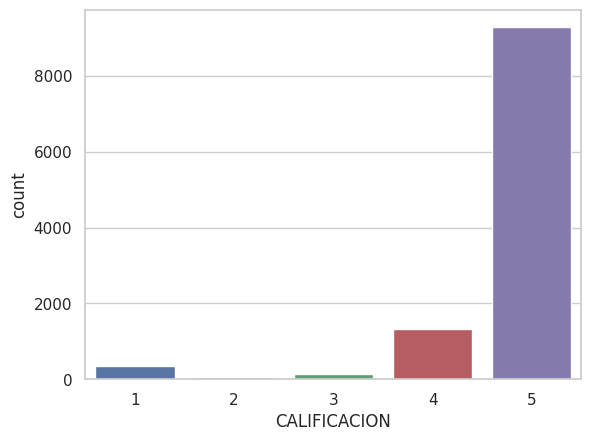

In [15]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.countplot(x=df["CALIFICACION"]);

Con la gráfica anterior, podemos observar que efectivamente existe un desbalanceo en nuestros datos, la gran mayoría estan acumulados en la valoración de 5 estrellas, mientras muy pocos estan en las valoraciones intermedias (1,3,4).

Para este ejercicio, no tenemos mas variables que sean de mucho interés para nosotros explorar, ya que practicamente se tratan de identificadores en nuestro dataframe.

No contamos en nuestros datos alguna otra variable numérica con la que podamos hacer ejercicios de corralción u algún otro tema, ya que básicamente nos estamos enfocando en la variable de calificación únicamente.

Para nuestro caso, los datos están listos para ser usados y ser trabajados para la creación de nuestro sistema de recomendaciones, actualmente los datos están en los formatos adecuados, no tenemos faltantes, las columnas y la información esta completa para una primera iteración, no tenemos errores o temas que cambiar y/o manipular en nuestro dataframe, por ende, estamos preparados apra continuar con nuestro proyecto.